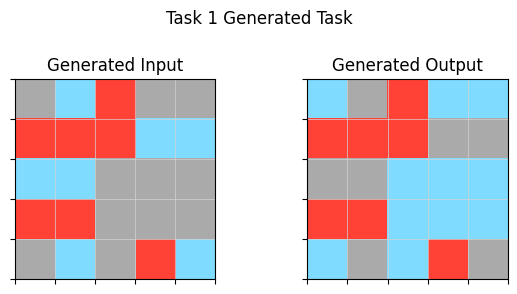

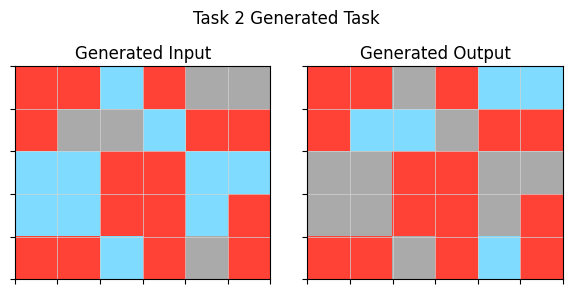

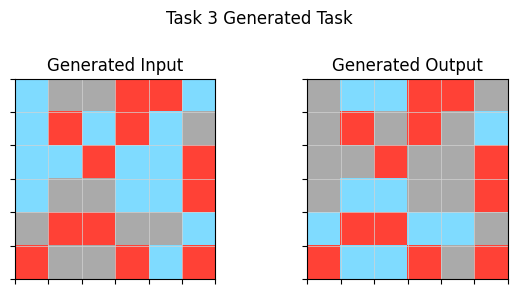

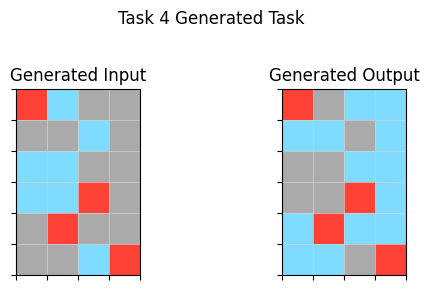

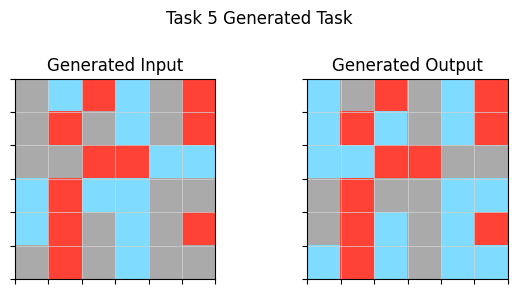

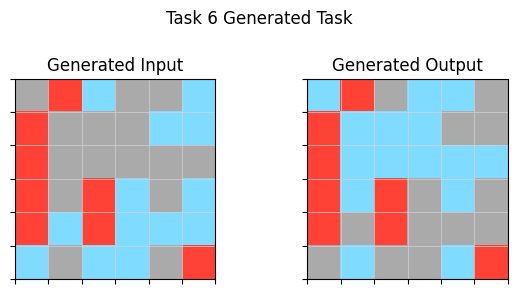

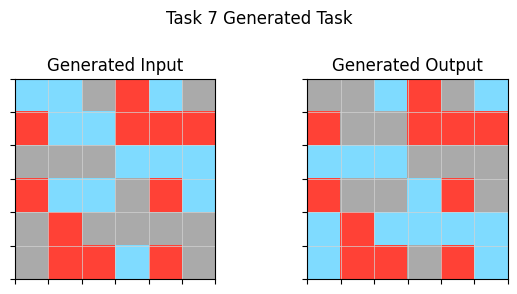

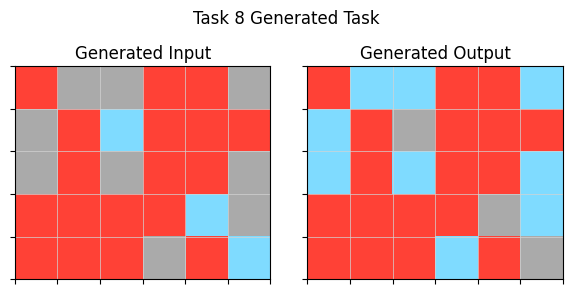

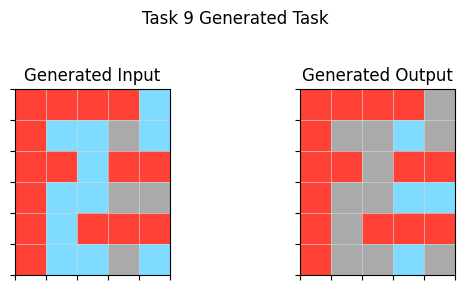

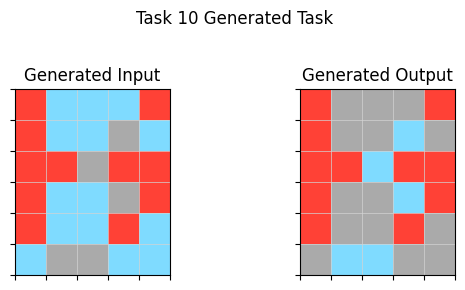

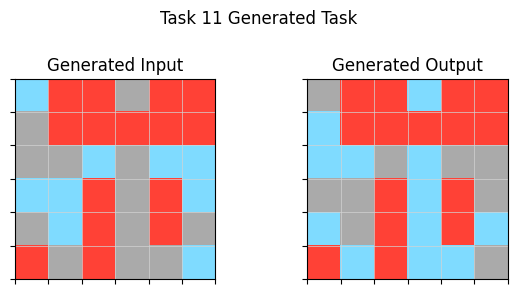

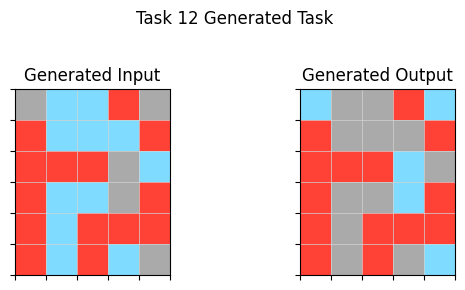

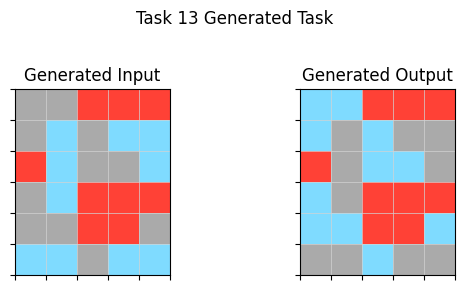

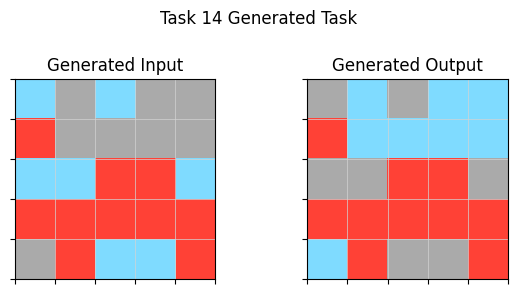

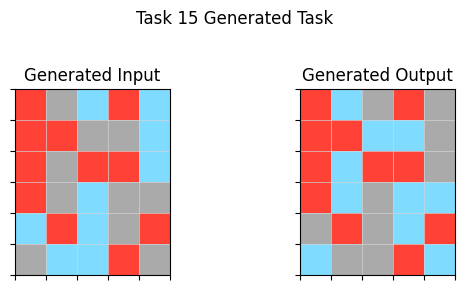

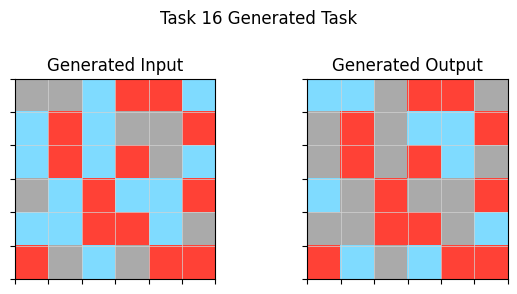

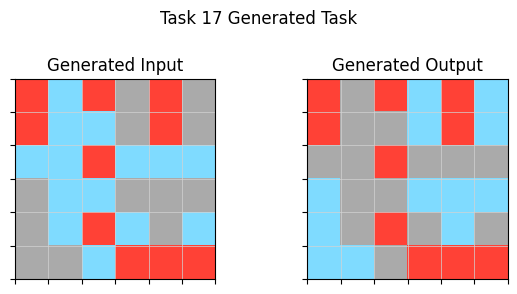

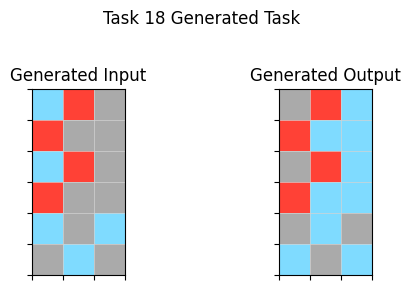

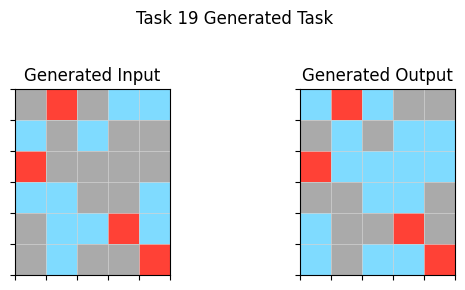

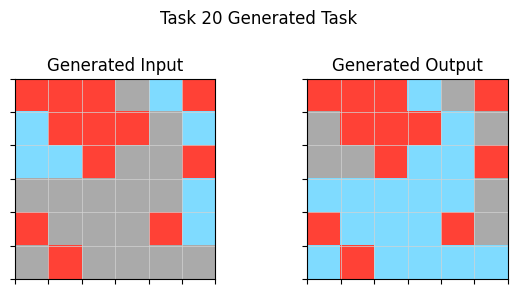

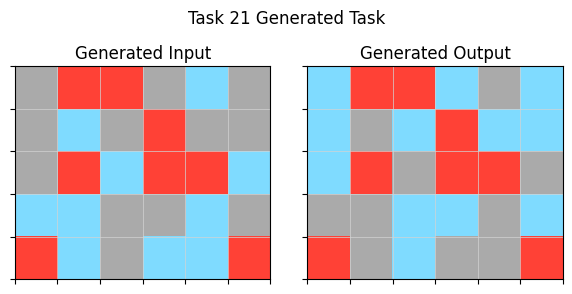

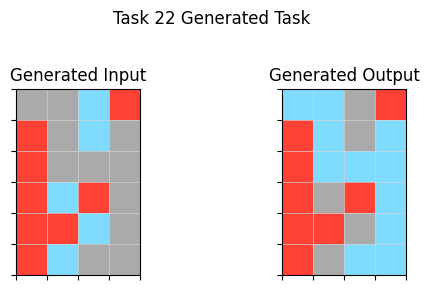

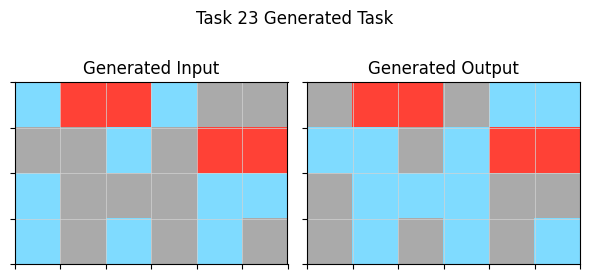

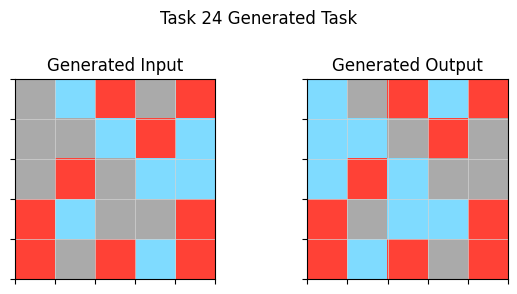

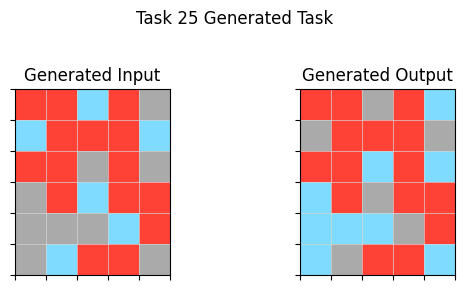

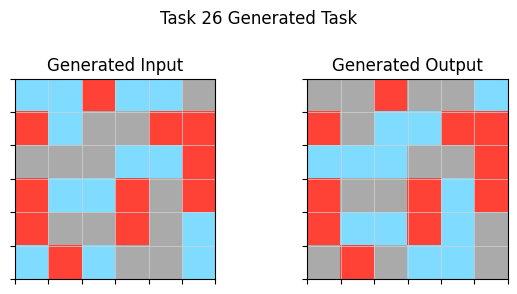

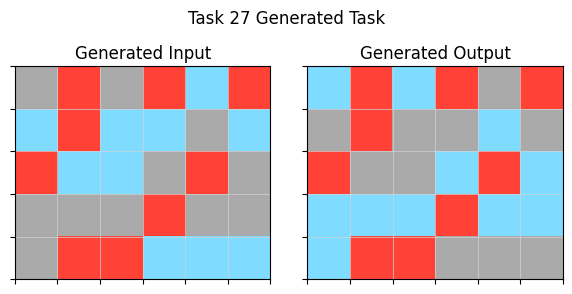

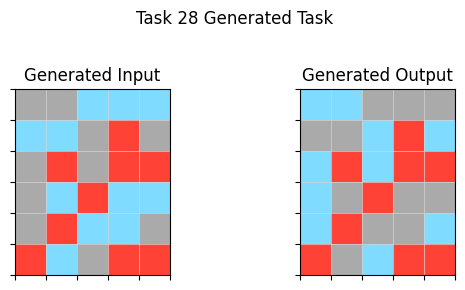

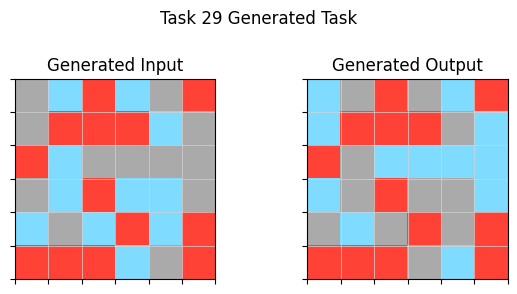

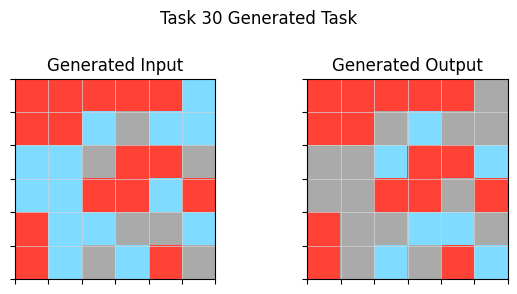

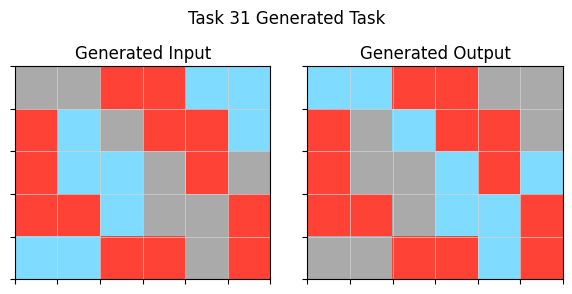

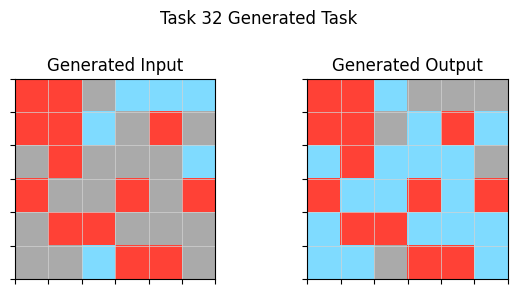

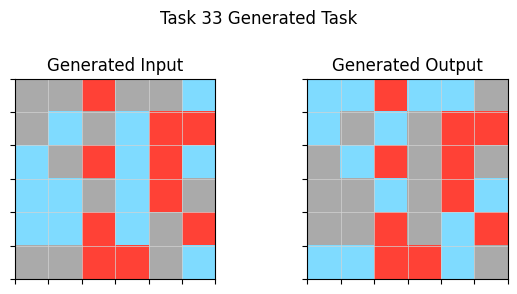

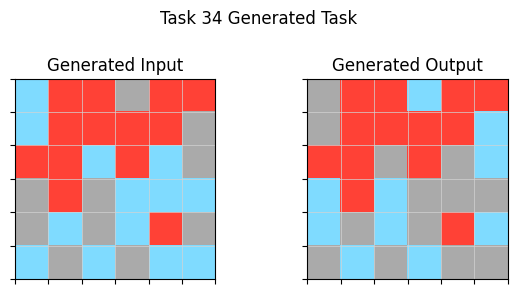

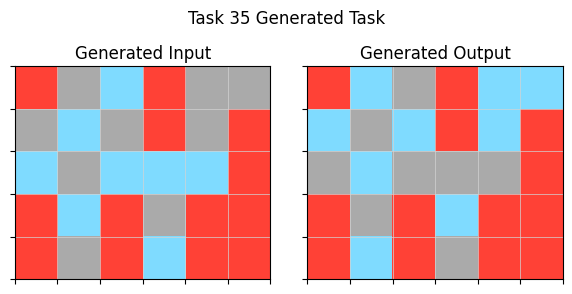

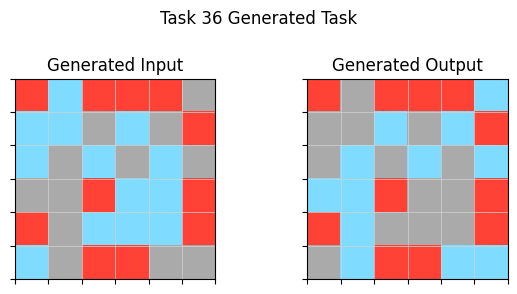

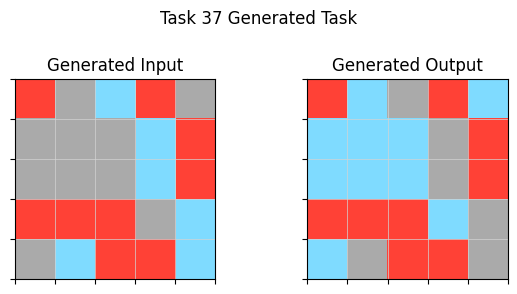

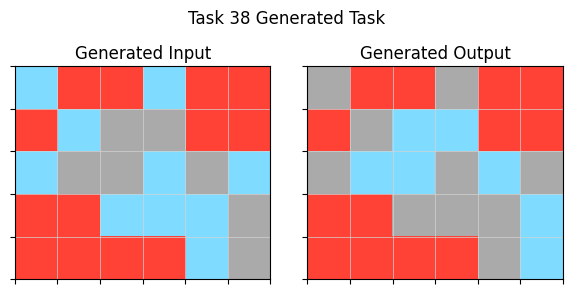

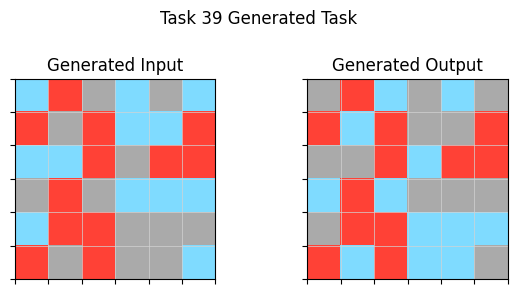

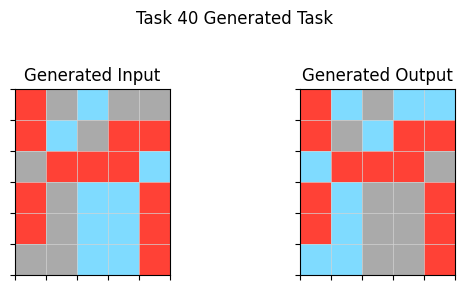

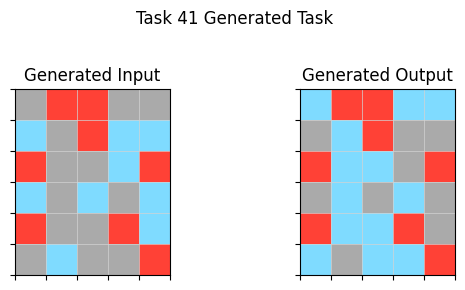

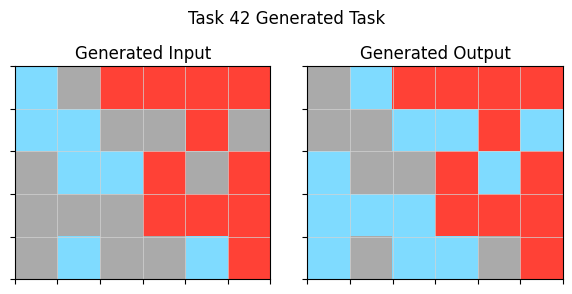

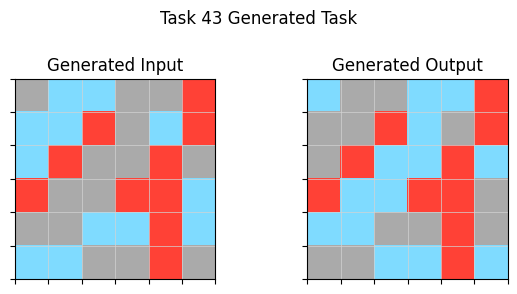

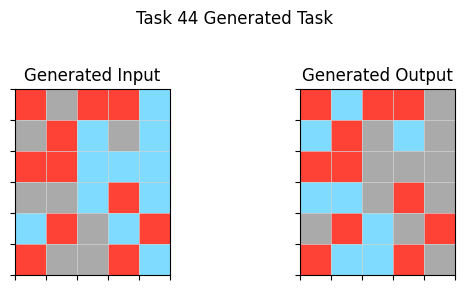

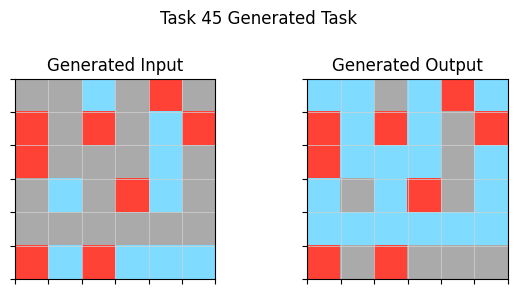

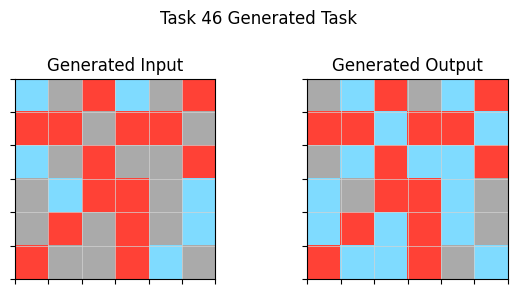

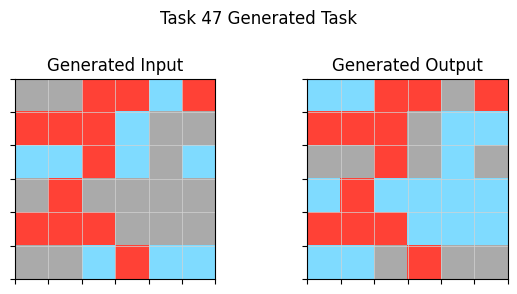

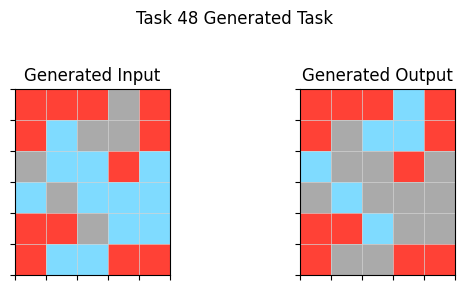

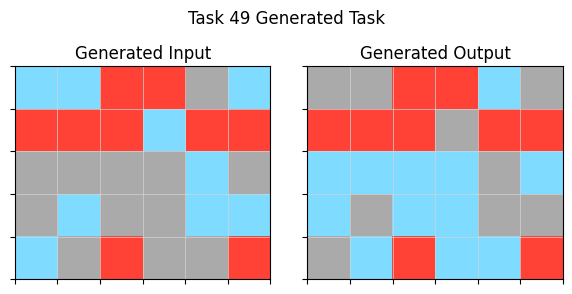

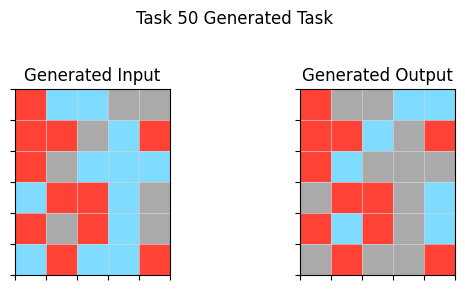

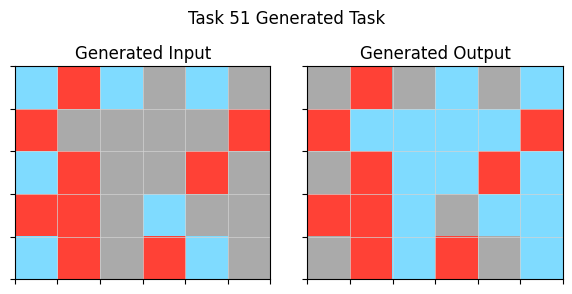

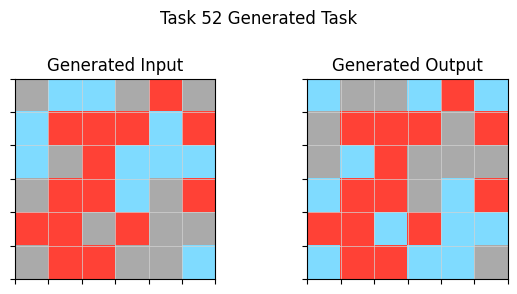

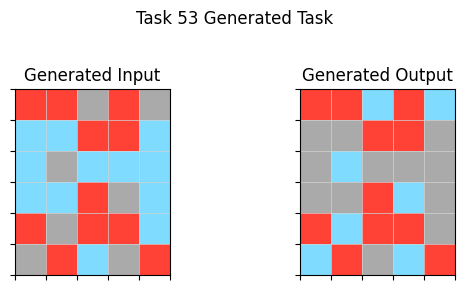

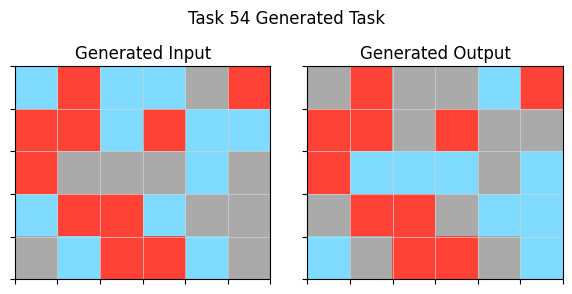

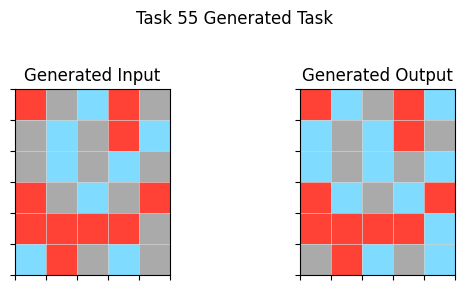

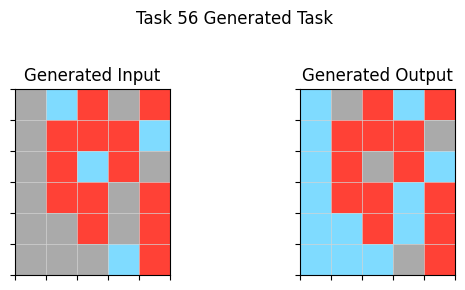

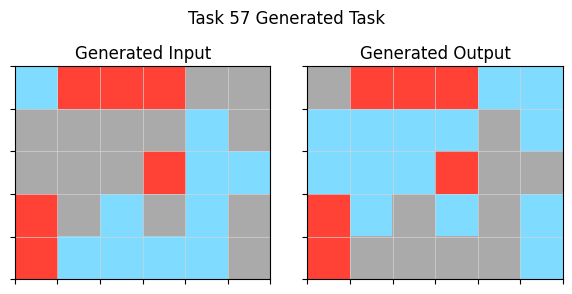

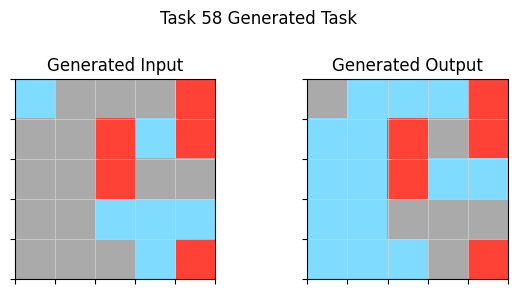

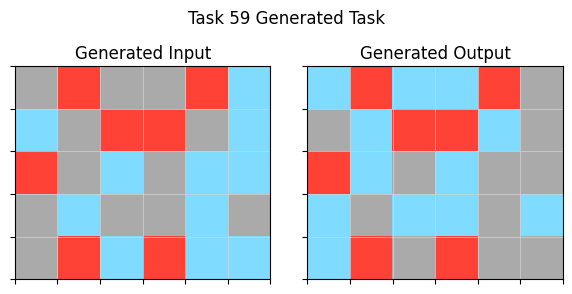

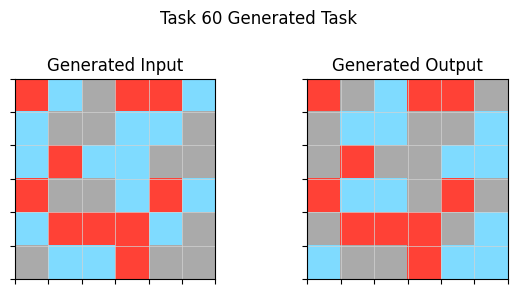

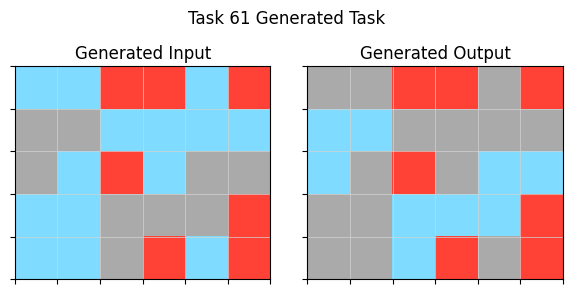

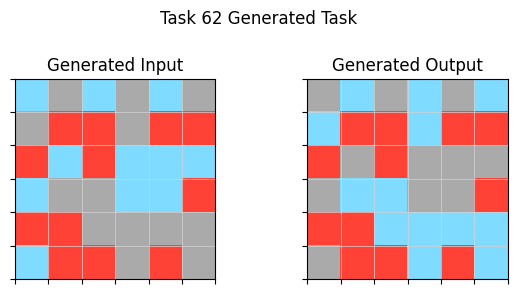

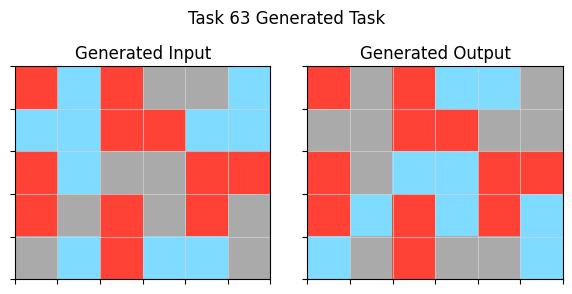

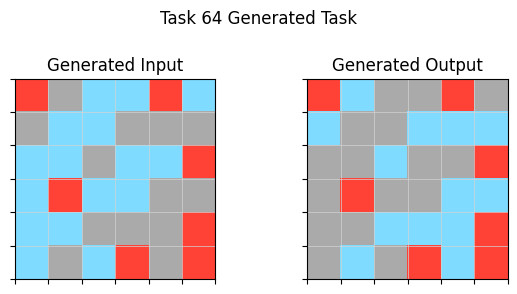

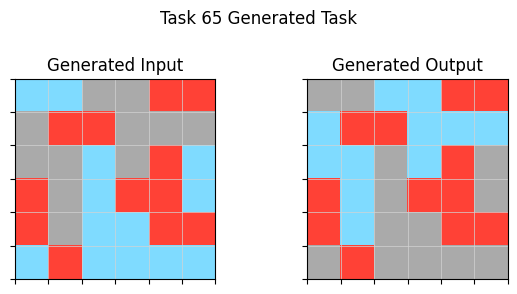

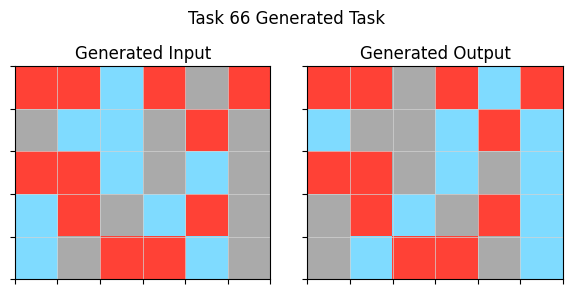

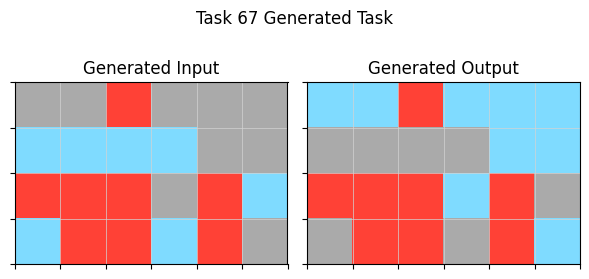

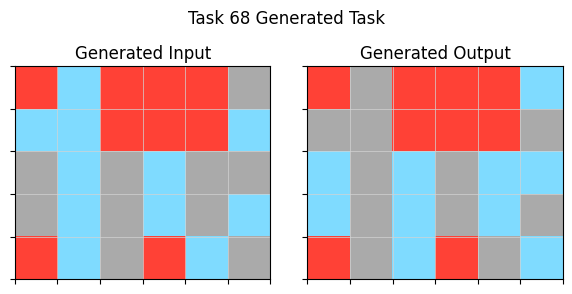

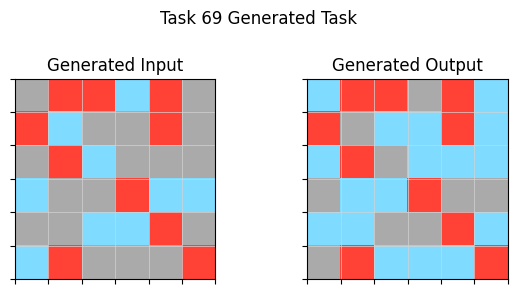

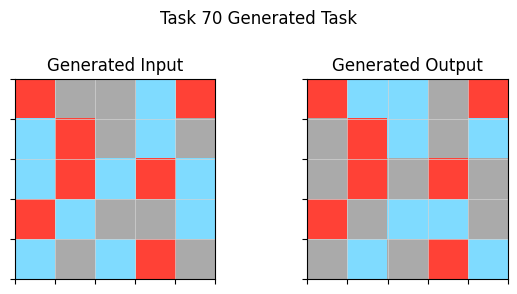

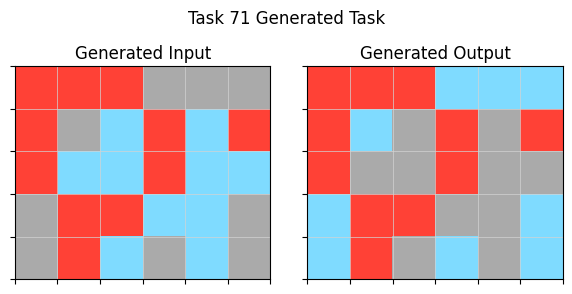

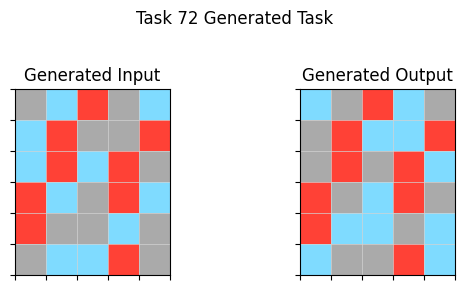

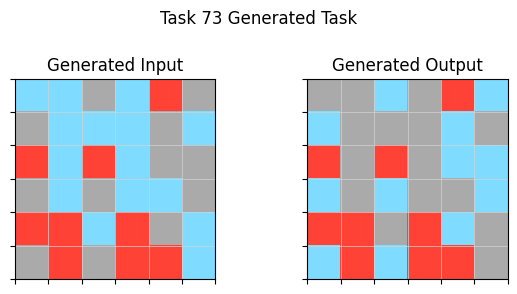

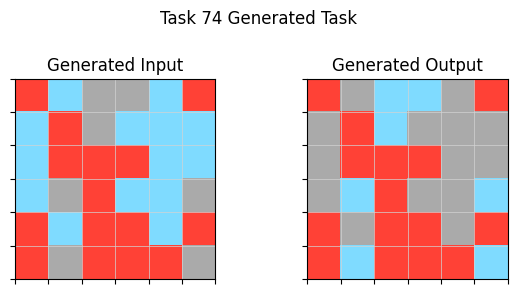

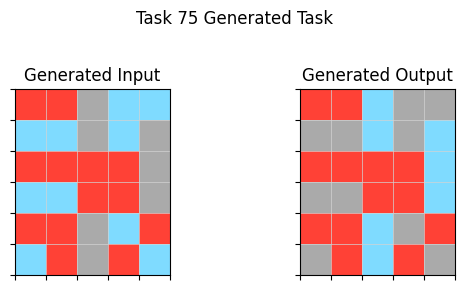

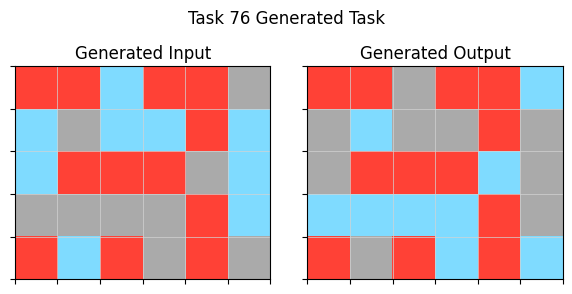

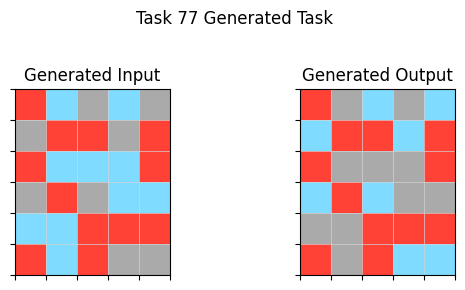

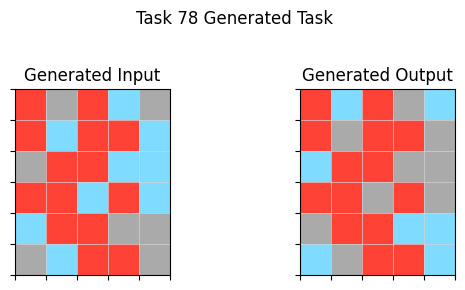

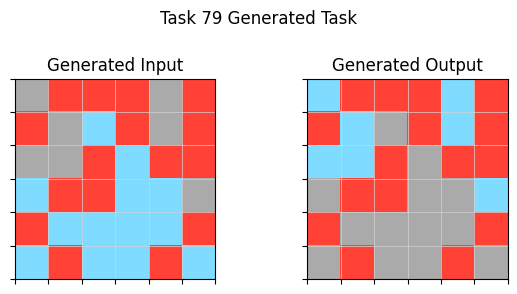

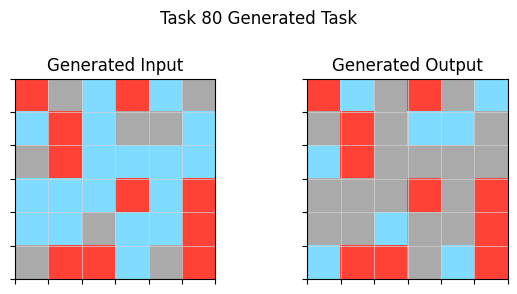

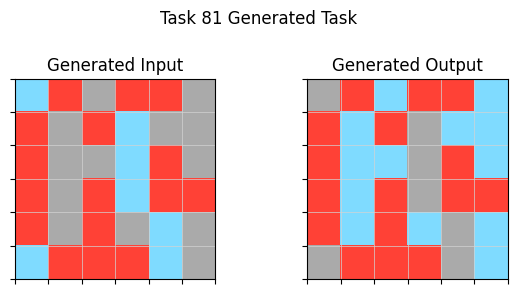

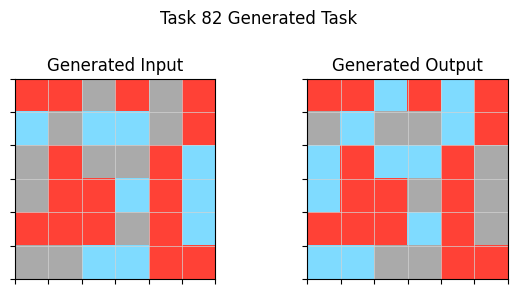

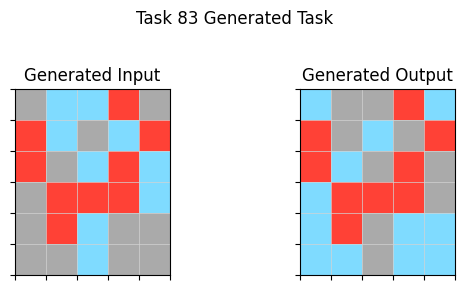

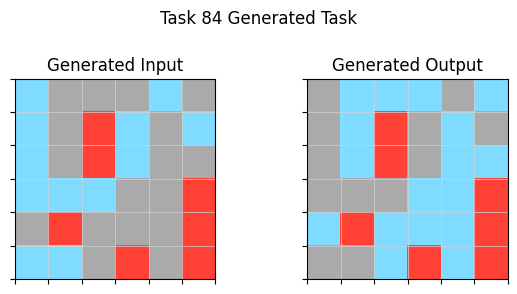

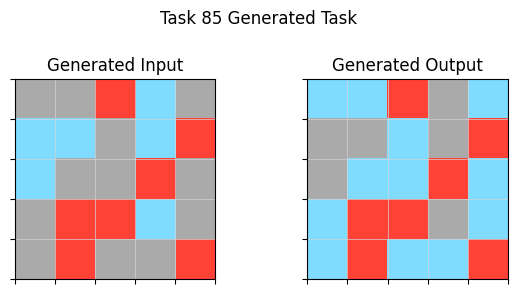

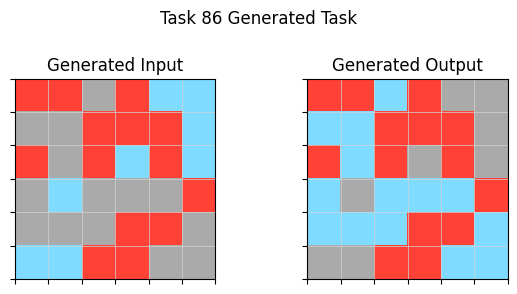

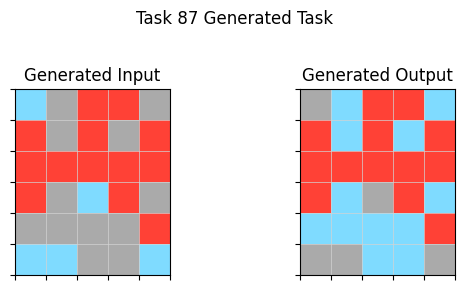

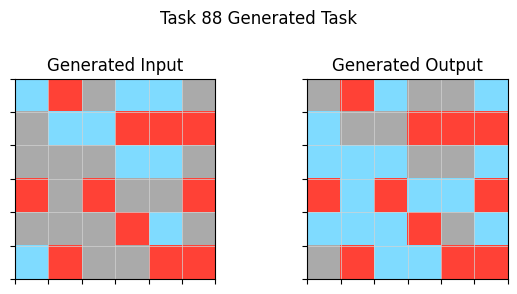

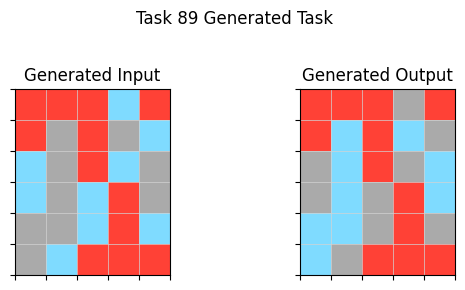

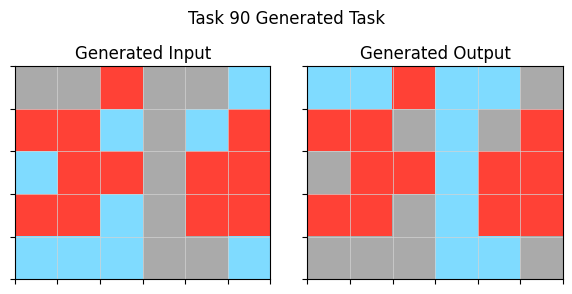

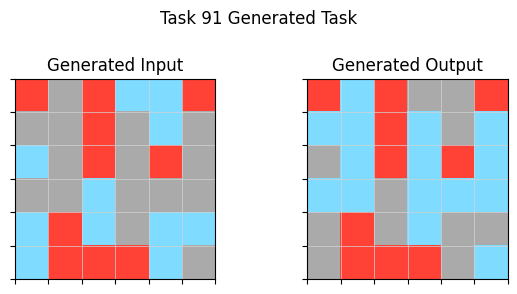

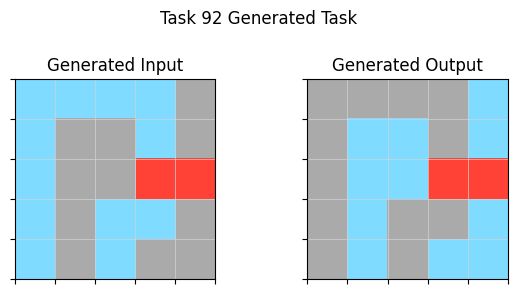

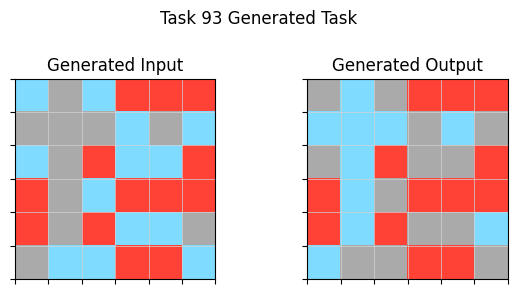

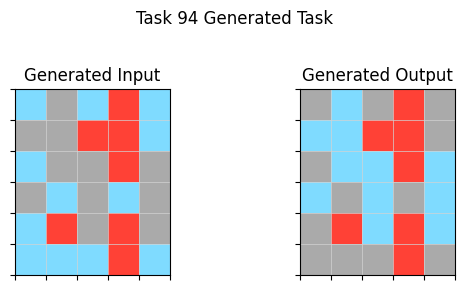

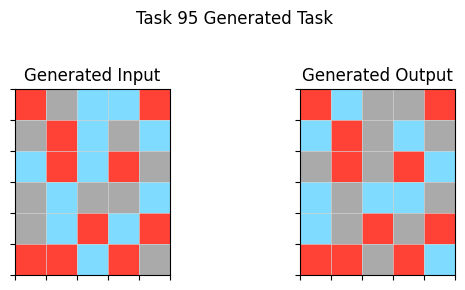

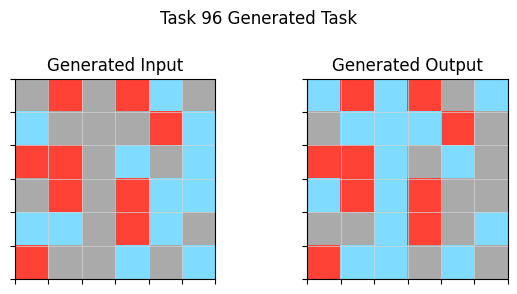

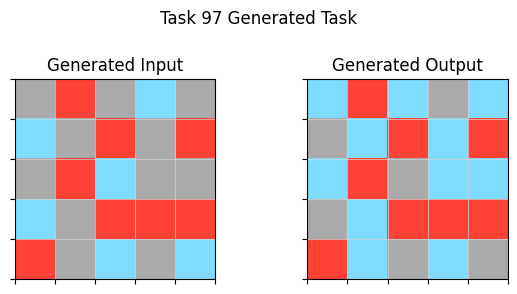

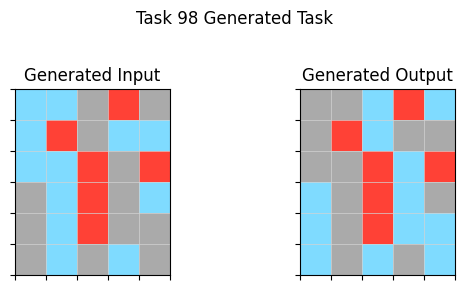

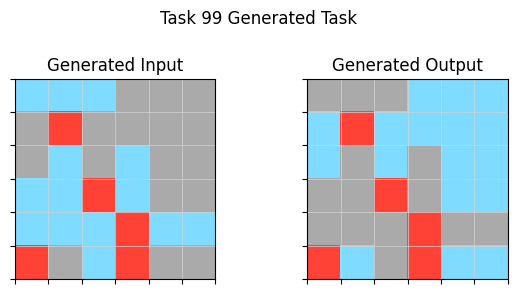

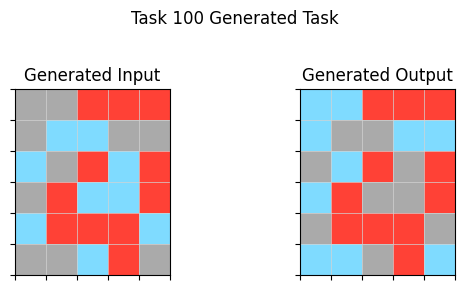

In [2]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to switch colors in a grid
def switch(grid, a, b):
    """Switch color a and b in the grid."""
    return tuple(tuple(v if (v != a and v != b) else {a: b, b: a}[v] for v in r) for r in grid)

# Solve function for the given task
def solve_d511f180(I):
    O = switch(I, 5, 8)
    return O

# Transformation functions (rotation, flipping)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

# Generate the initial population of grids with random grid sizes
def generate_initial_population(num_individuals=10, min_size=3, max_size=6):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        individual = {
            'input_grid': np.random.choice([2, 5, 8], size=(rows, cols))  # Randomly generate grid with 2, 5, 8
        }
        # Ensure each grid follows the color switch rule
        individual['output_grid'] = switch(individual['input_grid'], 5, 8)
        population.append(individual)
    return population

# Fitness function to reward the correct switching of colors
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = switch(input_grid, 5, 8)
    
    # Count the number of correctly switched pixels
    correctly_switched = np.sum(np.array(individual['output_grid']) == np.array(expected_output))
    
    return correctly_switched

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = switch(child_input, 5, 8)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([2, 5, 8])  # Change between colors 2, 5, 8
    individual['output_grid'] = switch(grid, 5, 8)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=3, max_size=6):
    population = generate_initial_population(population_size, min_size, max_size)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00', '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate and visualize 10 new tasks
starter_task = {"train": [{"input": [[2, 7, 8, 8, 8], [5, 5, 6, 5, 4], [8, 5, 5, 5, 2], [8, 8, 4, 3, 6], [6, 5, 1, 9, 3]], "output": [[2, 7, 5, 5, 5], [8, 8, 6, 8, 4], [5, 8, 8, 8, 2], [5, 5, 4, 3, 6], [6, 8, 1, 9, 3]]}]}

new_tasks = []
for i in range(100):  # Generate 10 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=10, min_size=3, max_size=6)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))
